In [ ]:
# !pip install torchsummary

In [ ]:
# # import the required packages
# import torch
# import argparse
# import numpy as np
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import datasets, transforms
# from torch.autograd import Variable

# from torchvision.utils import save_image

# from torchvision.utils import make_grid

# from torch.utils.tensorboard import SummaryWriter
# import datetime
# import matplotlib.pyplot as plt
# from torchvision.utils import make_grid
# from torch.utils.tensorboard import SummaryWriter
# from torchsummary import summary
# from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import numpy as np
# import torch
# from torchvision.utils import save_image
# import torch.nn as nn

import os

In [ ]:
new_data_dir = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized"

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(
    new_data_dir, label_mode=None, image_size=(64, 64), batch_size=16
)

Found 13779 files belonging to 1 classes.


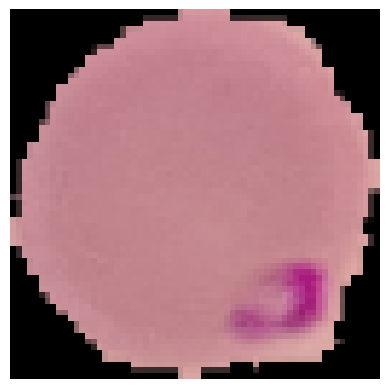

In [ ]:
image_batch = next(iter(train_images))
random_index = np.random.choice(image_batch.shape[0])
random_image = image_batch[random_index].numpy().astype("int32")
plt.axis("off")
plt.imshow(random_image)
plt.show()

In [ ]:
# Normalize the images to [-1, 1] which is the range of the tanh activation
train_images = train_images.map(lambda x: (x - 127.5) / 127.5)

In [ ]:
# latent dimension of the random noise
LATENT_DIM = 128
# weight initializer for G per DCGAN paper 
WEIGHT_INIT = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02) 
# number of channels, 1 for gray scale and 3 for color images
CHANNELS = 3

In [ ]:
import os
source = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized"

len(os.listdir(source))

13780

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

In [ ]:
!pwd

/kaggle/working


In [ ]:
!mkdir /kaggle/working/Parasitizednew

mkdir: cannot create directory ‘/kaggle/working/Parasitizednew’: File exists


In [ ]:
!mkdir /kaggle/working/Parasitizednew/subfolder_1

mkdir: cannot create directory ‘/kaggle/working/Parasitizednew/subfolder_1’: File exists


In [ ]:
!mkdir /kaggle/working/Parasitizednew/subfolder_2

mkdir: cannot create directory ‘/kaggle/working/Parasitizednew/subfolder_2’: File exists


In [ ]:
# !rmdir  --ignore-fail-on-non-empty /content/drive/MyDrive/Parasitized/subfolder_1

In [ ]:

# !kaggle datasets download -d iarunava/cell-images-for-detecting-malaria



In [ ]:
# !unzip -q cell-images-for-detecting-malaria.zip


In [ ]:
!mkdir /kaggle/working/Parasitized_generated

mkdir: cannot create directory ‘/kaggle/working/Parasitized_generated’: File exists


In [ ]:
# import os
# os.makedirs("Parasitized_generated%d" % (1), exist_ok=True) 
# cuda = True if torch.cuda.is_available() else False

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# batch_size = 16

In [ ]:
# image_shape = (3, 64, 64)
# image_dim = int(np.prod(image_shape))
# latent_dim = 100

In [ ]:
# def weights_init_normal(m):
#     classname = m.__class__.__name__
#     if classname.find("Conv") != -1:
#         torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
#     elif classname.find("BatchNorm2d") != -1:
#         torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
#         torch.nn.init.constant_(m.bias.data, 0.0)

In [ ]:
# import os
# import shutil

# # Set the path of the folder containing the images to split
# source_folder = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized"

# # Set the paths of the two destination folders
# folder_1 = "/kaggle/working/Parasitizednew/subfolder_1"
# folder_2 = "/kaggle/working/Parasitizednew/subfolder_2"

# # Create the destination folders if they don't exist
# if not os.path.exists(folder_1):
#     os.makedirs(folder_1)
# if not os.path.exists(folder_2):
#     os.makedirs(folder_2)
# new_size = (64,64)
# counter = 0
# # Loop through each file in the source folder
# for file_name in os.listdir(source_folder):
#     # Set the condition for which files should be moved to folder_1
#     if counter % 2 == 0:
#         # Move the file to folder_1
#         if file_name.endswith(".png"):

#           img_path = os.path.join(source_folder, file_name)
#           img = Image.open(img_path)

#           # Resize the image
#           img = img.resize(new_size)

#           # Save the resized image to the output directory
#           output_path = os.path.join(folder_1, file_name)
#           img.save(output_path)

#         # shutil.copy2(os.path.join(source_folder, file_name), os.path.join(folder_1, file_name))
#     # Set the condition for which files should be moved to folder_2
#     elif counter % 2 == 1:
#         # Move the file to folder_2
#         if file_name.endswith(".png"):
#           img_path = os.path.join(source_folder, file_name)
#           img = Image.open(img_path)

#           # Resize the image
#           img = img.resize(new_size)

#           # Save the resized image to the output directory
#           output_path = os.path.join(folder_2, file_name)
#           img.save(output_path)

#         # shutil.copy2(os.path.join(source_folder, file_name), os.path.join(folder_2, file_name))
#     # Skip files that don't meet either condition
#     else:
#         continue
#     counter += 1


In [ ]:
# !mkdir /content

In [ ]:
# folder_1 = "/content/drive/MyDrive/Parasitized3/subfolder_1"
# folder_2 = "/content/drive/MyDrive/Parasitized3/subfolder_2"


In [ ]:
# import os
# print(len(os.listdir(folder_1)))

In [ ]:
# print(len(os.listdir(folder_2)))

In [ ]:
# print(len(os.listdir(source_folder)))

In [ ]:
def build_generator():
    # create a Keras Sequential model 
    model = Sequential(name="generator")

    # prepare for reshape: FC => BN => RN layers, note: input shape defined in the 1st Dense layer  
    model.add(layers.Dense(8 * 8 * 512, input_dim=LATENT_DIM))
    # model.add(layers.BatchNormalization()) 
    model.add(layers.ReLU())
    # layers.LeakyReLU(alpha=0.2),

    # 1D => 3D: reshape the output of the previous layer 
    model.add(layers.Reshape((8, 8, 512)))

    # upsample to 16x16: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(256, (4, 4), 
                                     strides=(2, 2),
                                     padding="same", 
                                     use_bias=False, 
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization()) 
    model.add((layers.ReLU()))

    # upsample to 32x32: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(128, (4, 4), 
                                     strides=(2, 2),
                                     padding="same", 
                                     use_bias=False, 
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization()) 
    model.add((layers.ReLU()))
    
    # upsample to 64x64: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(4, (4, 4), 
                                     strides=(2, 2),
                                     padding="same", 
                                     use_bias=False, 
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization()) 
    model.add((layers.ReLU()))

    # final layer: Conv2D with tanh activation
    model.add(layers.Conv2D(CHANNELS, (4, 4), padding="same", activation="tanh"))

    # return the generator model
    return model

In [ ]:
# build the generator model
generator = build_generator()

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32768)             4227072   
                                                                 
 re_lu_4 (ReLU)              (None, 32768)             0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 256)      2097152   
 ranspose)                                                       
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 256)      1024      
 hNormalization)                                                 
                                                                 
 re_lu_5 (ReLU)              (None, 16, 16, 256)       0 

In [ ]:
def build_critic(height, width, depth, alpha=0.2):
    # Weight clipping to [-1, 1] to enfoce 1-Lipschitz constraint
    # constraint = WeightClip(0.01) # UPDATE for WGAN-GP: remove weight clipping

    # create a Keras Sequential model
    model = Sequential(name="critic")
    input_shape = (height, width, depth)

    # 1. first set of CONV => BN => leaky ReLU layers
    model.add(layers.Conv2D(64, (4, 4), 
                            padding="same", 
                            strides=(2, 2), 
                            # kernel_constraint = constraint, # UPDATE for WGAN-GP: remove weight clipping
                            input_shape=input_shape))
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 2. second set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4), 
                            padding="same", 
                            strides=(2, 2))) 
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 3. third set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4), 
                            padding="same", 
                            strides=(2, 2))) 
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))
    
    # flatten and apply dropout
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3)) 

    # linear activation in the last layer 
    # Note: Keras `Dense` layer by default is already a `linear` activation
    model.add(layers.Dense(1, activation="linear"))

    # return the critic model
    return model


In [ ]:
# build the critic model
critic = build_critic(64, 64, 3)

In [ ]:
critic.summary()

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0    

In [ ]:
class WGAN_GP(keras.Model):
    def __init__(self, 
                 critic, 
                 generator, 
                 latent_dim, 
                 critic_extra_steps, 
                 gp_weight=10.0): # UPDATE for WGAN-GP: gradient penalty weight
        super().__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.c_extra_steps = critic_extra_steps
        self.gp_weight = gp_weight # WGAN-GP
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]
    
    # UPDATE for WGAN-GP: use gradient penalty instead of weight clipping
    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        Gradient penalty is calculated on an interpolated image
        and added to the discriminator loss.
        """
        
        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        # 1. Create the interpolated image
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 2. Get the Critic's output for the interpolated image
            pred = self.critic(interpolated, training=True)

        # 3. Calculate the gradients w.r.t to the interpolated image
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 4. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        # 5. Calculate gradient penalty
        gradient_penalty = tf.reduce_mean((norm - 1.0) ** 2)
        return gradient_penalty

    def train_step(self, real_images):

        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train the critic more often than the generator by 5 times (self.c_extra_steps) 
        for i in range(self.c_extra_steps):
            # Step 1. Train the critic with both real images and fake images
            with tf.GradientTape() as tape:
                pred_real = self.critic(real_images, training=True)
                fake_images = self.generator(noise, training=True) 
                pred_fake = self.critic(fake_images, training=True)
                # UPDATE for WGAN-GP: Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # UPDATE for WGAN-GP: Add gradient penalty to the original critic loss 
                d_loss = self.d_loss_fn(pred_real, pred_fake) + gp * self.gp_weight 
            # Compute critic gradients
            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            # Update critic weights
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        # Step 2. Train the generator (do not update weights of the critic)
        misleading_labels = tf.ones((batch_size, 1)) # G wants D to think the fake images are real (label as 1)

        with tf.GradientTape() as tape:
            fake_images = self.generator(noise, training=True)
            pred_fake = self.critic(fake_images, training=True)
            g_loss = self.g_loss_fn(pred_fake)
        # Compute generator gradients
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update generator wieghts
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=256, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim
        #self.right_path = 'Forest' + str(p)

        # Create random noise seed for visualization during traing
        self.seed = tf.random.normal([256, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.model.generator(self.seed)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images= generated_images.numpy()
        

        if epoch == NUM_EPOCHS-1:
            #fig = plt.figure(figsize=(64, 64))
            px = 1/plt.rcParams['figure.dpi']  # pixel in inches
            fig = plt.figure(figsize=(64*px, 64*px))
            #plt.subplots(figsize=(600*px, 200*px))
            for i in range(self.num_img):
                #plt.subplot(4, 4, i+1)
                img = keras.utils.array_to_img(generated_images[i]) 
                plt.imshow(img)
                plt.axis('off')
                plt.savefig('/kaggle/working/Parasitized_generated/parasitized{:03d}.png'.format(i))
        else:
            pass

In [ ]:
wgan_gp = WGAN_GP(critic=critic, 
              generator=generator, 
              latent_dim=LATENT_DIM,
              critic_extra_steps=5)

In [ ]:
# Wasserstein loss for the critic
def d_wasserstein_loss(pred_real, pred_fake):
    real_loss = tf.reduce_mean(pred_real)
    fake_loss = tf.reduce_mean(pred_fake)
    return fake_loss - real_loss

# Wasserstein loss for the generator
def g_wasserstein_loss(pred_fake):
    return -tf.reduce_mean(pred_fake)

In [ ]:
LR = 0.0002 # WGAN-GP paper recommends lr of 0.0002
d_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0.5, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp
g_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0.5, beta_2=0.9) # UPDATE for WGAN-GP: 

In [ ]:
wgan_gp.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,  
    d_loss_fn = d_wasserstein_loss,
    g_loss_fn = g_wasserstein_loss
)

Epoch 1/100
862/862 [==============================] - 93s 97ms/step - d_loss: -53.8330 - g_loss: 112.4504
Epoch 2/100
862/862 [==============================] - 83s 96ms/step - d_loss: -12.6830 - g_loss: 48.7271
Epoch 3/100
862/862 [==============================] - 83s 97ms/step - d_loss: -10.5563 - g_loss: 28.1526
Epoch 4/100
862/862 [==============================] - 83s 97ms/step - d_loss: -9.2957 - g_loss: 17.4727
Epoch 5/100
862/862 [==============================] - 83s 96ms/step - d_loss: -8.7686 - g_loss: 23.1078
Epoch 6/100
862/862 [==============================] - 83s 96ms/step - d_loss: -8.0022 - g_loss: 23.0023
Epoch 7/100
862/862 [==============================] - 83s 96ms/step - d_loss: -7.0571 - g_loss: 12.0636
Epoch 8/100
862/862 [==============================] - 83s 96ms/step - d_loss: -6.2115 - g_loss: 14.6986
Epoch 9/100
862/862 [==============================] - 83s 96ms/step - d_loss: -5.6832 - g_loss: 2.4488
Epoch 10/100
862/862 [==============================

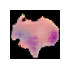

In [ ]:
NUM_EPOCHS = 100 # number of epochs
wgan_gp.fit(train_images, epochs=NUM_EPOCHS, callbacks=[GANMonitor(num_img=256, latent_dim=LATENT_DIM)])

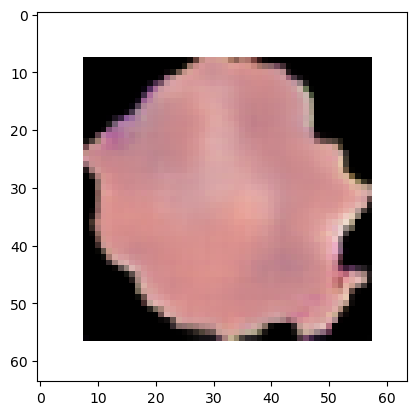

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/kaggle/working/Parasitized_generated/parasitized102.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()


In [ ]:
train_and_generate()